In [67]:
import sys
sys.path.insert(0,'..')

from src.models import *
from src.loss_functions import *
from src.noise import *
from src.metrics import *
from src.plotting import *
from src.generate_data import *
from src.real_data import *

import sklearn
from sklearn.metrics import roc_curve, auc
import pandas as pd
from supervenn import supervenn

from scipy.stats import bernoulli, spearmanr

from operator import xor

import os





In [70]:
y_true = [1,1,1,1]
y_pred = [0,0,0,1]
y_probs = [[0.8,0.2],
           [0.8, 0.2],
           [0.8, 0.2],
           [0.2, 0.8]]

T = np.array([[0.6, 0.4],
              [0.4, 0.6]])

In [71]:
instance_01loss(y_true, y_pred)

(0.75, array([1, 1, 1, 0]))

In [72]:
natarajan_unbiased_01_loss(y_true, y_pred, T)


(1.7500000000000004, array([ 3.,  3.,  3., -2.]), 0.75, array([1, 1, 1, 0]))

In [73]:
instance_forward_01loss(y_true, y_probs, T)

(0.75, array([1, 1, 1, 0]))

In [78]:

dataset = "cshock_eicu"
noise_type = "class_conditional"
model_type = "LR"
n_models = 100
max_iter = 10000

T = np.array([[1.0, 0.],
              [0.3, 0.7]])

all_metrics = []

for training_loss in ["None", "forward", "backward"]:
    vectors = run_experiment(dataset, noise_type, model_type, n_models=n_models, max_iter=max_iter, training_loss=training_loss, T=T)
    
    metrics_calculator = MetricsCalculator(vectors)
    
    for draw_id in range(5):
        metrics_calculator.calculate_metrics(draw_id)
        
    metrics = metrics_calculator.get_metrics()

    for method in vectors.vectors.keys():
        for draw_id in range(5):
            metric_names = ["pop_err_anticipated_train", "pop_err_true_train", "empirical_regret_train", "fpr_train", "fnr_train"]
            for metric_name in metric_names:
                value = metrics.get_metric(method, draw_id, metric_name)
                if value is not None:
                    all_metrics.append({
                        "training_loss": training_loss,
                        "err_method": method,
                        "draw_id": draw_id,
                        "metric_name": metric_name,
                        "value": value
                    })



  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

  0%|          | 0/10000 [00:00<?, ?it/s]

/tmp/ipykernel_8670/181990630.py:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x='err_method', y='value', hue='training_loss', data=df[df['metric_name'] == metric_name],


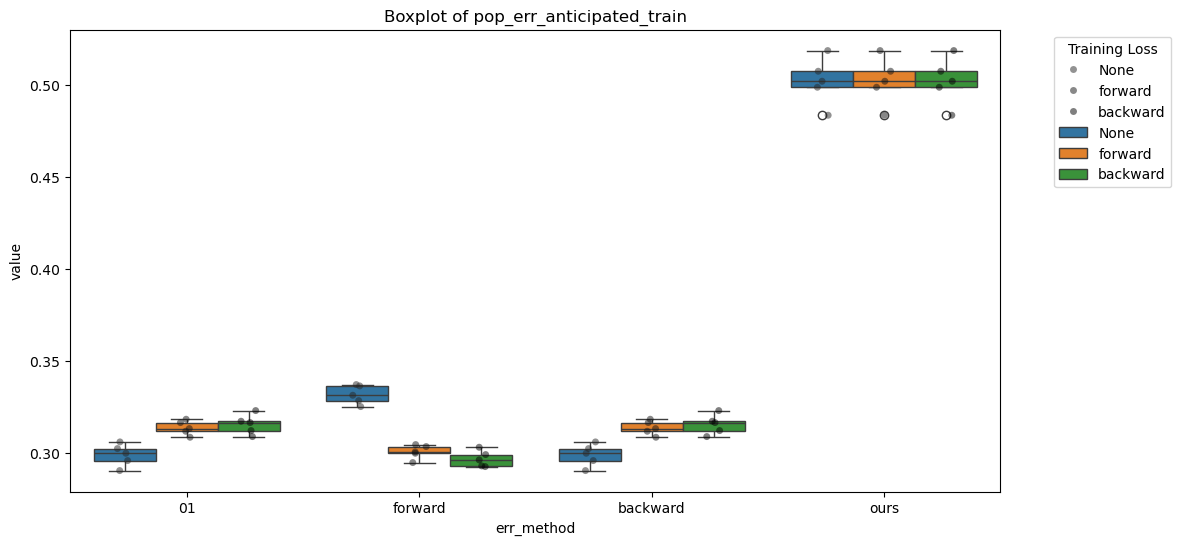

/tmp/ipykernel_8670/181990630.py:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x='err_method', y='value', hue='training_loss', data=df[df['metric_name'] == metric_name],


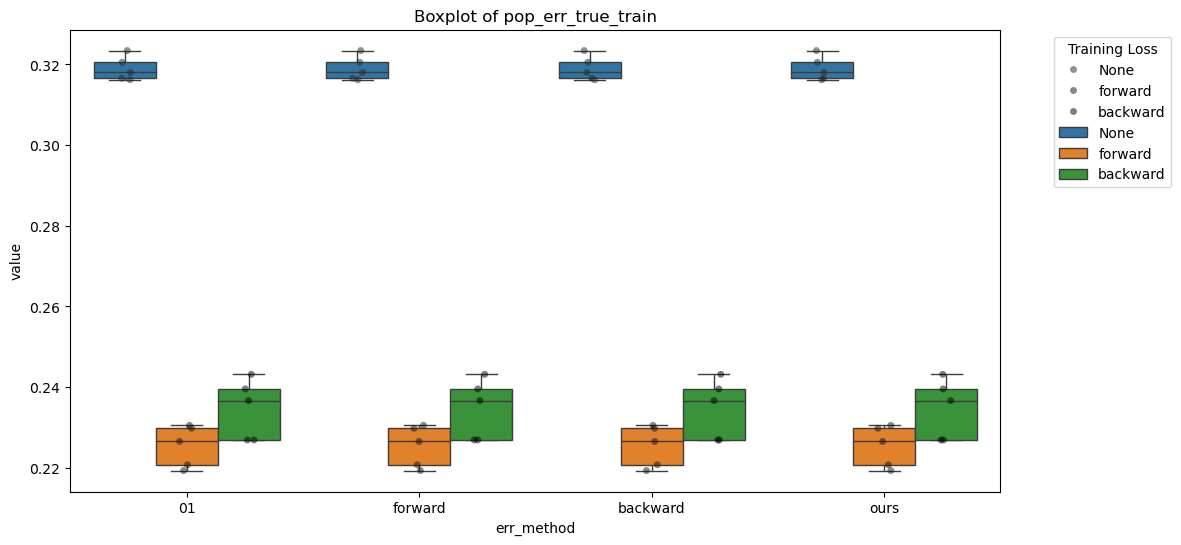

/tmp/ipykernel_8670/181990630.py:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x='err_method', y='value', hue='training_loss', data=df[df['metric_name'] == metric_name],


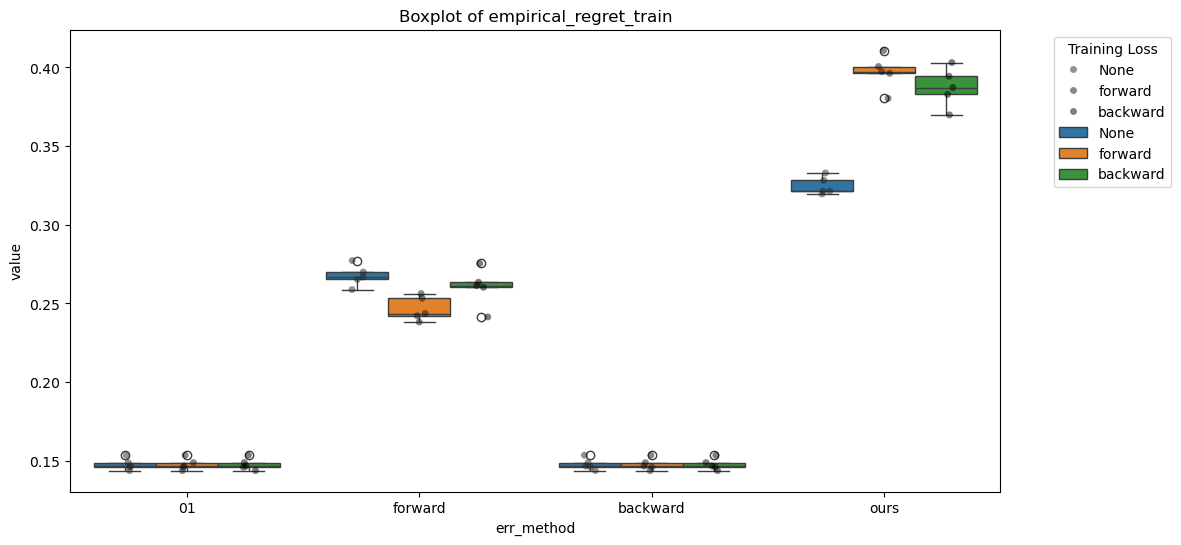

/tmp/ipykernel_8670/181990630.py:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x='err_method', y='value', hue='training_loss', data=df[df['metric_name'] == metric_name],


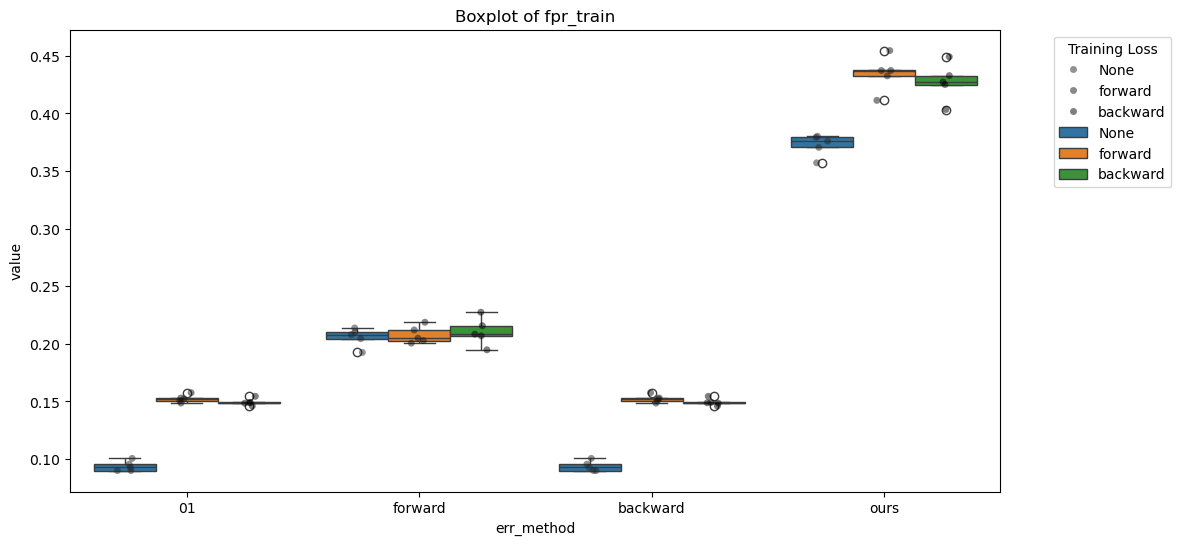

/tmp/ipykernel_8670/181990630.py:8: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.stripplot(x='err_method', y='value', hue='training_loss', data=df[df['metric_name'] == metric_name],


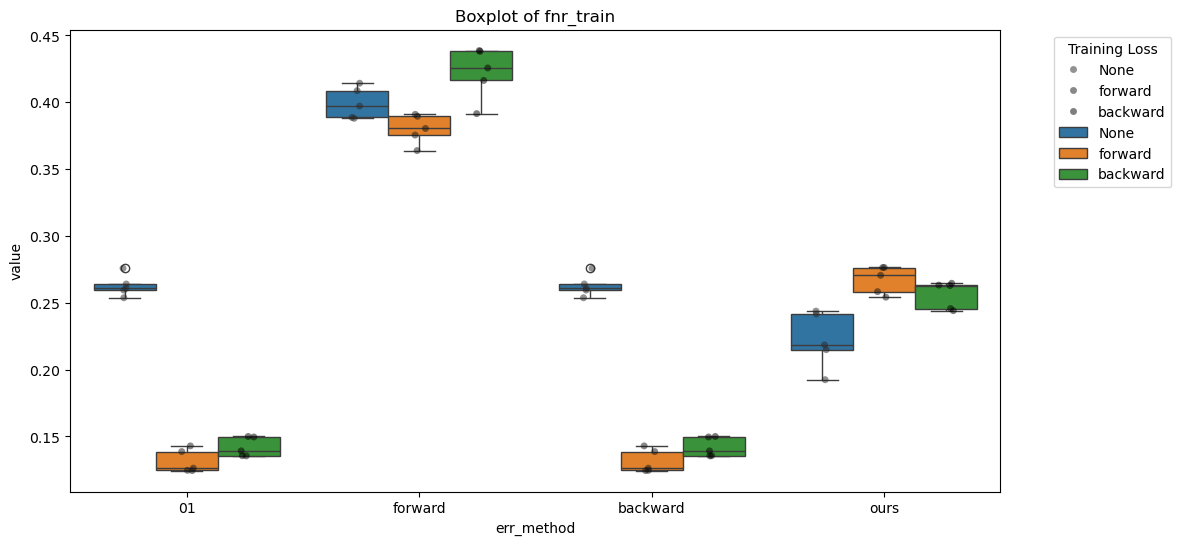

In [79]:
# Create a DataFrame from the collected metrics
metrics_df = pd.DataFrame(all_metrics)

# Function to create boxplots with scatter points
def create_boxplot(df, metric_name):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='err_method', y='value', hue='training_loss', data=df[df['metric_name'] == metric_name])
    sns.stripplot(x='err_method', y='value', hue='training_loss', data=df[df['metric_name'] == metric_name], 
                  dodge=True, marker='o', alpha=0.5, color='black')
    plt.title(f'Boxplot of {metric_name}')
    plt.legend(title='Training Loss', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Create boxplots for the desired metrics
for metric_name in ["pop_err_anticipated_train", "pop_err_true_train", "empirical_regret_train", "fpr_train", "fnr_train"]:
    create_boxplot(metrics_df, metric_name)


# Experiments

# Abstention 

In [ ]:
dataset = "cshock_eicu"
noise_type = "class_independent"

X_train, X_test, y_train, y_test, group_train, group_test = load_dataset_splits(dataset, group = "age")

y_train = y_train.astype(int)
y_test = y_test.astype(int)

for draw_id in range(5):
    u_vec = get_u(y_vec, T = T, seed= draw_id, noise_type = noise_type)
    flipped_labels = flip_labels(y_vec, u_vec)
    
    #Partition hold out on noisy data
    
    * Run Our Procedure on (noisy data - hold out)
    * 1) Remove ambiguous instances on train data? (Curious about this)
        * Train model naively
        * Evaluate on clean test set
    * 2) Train model naively
        * During test time, abstain on ambiguous predictions
        * Compute clean population error 01 loss on test
        * Vary threshold on abstention
            * Compute sum individual regret on test vs coverage